<a href="https://colab.research.google.com/github/ta1231/ML_Practice/blob/main/Dense_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf

In [ ]:
# 디바이스 확인
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13518154143319783740]

In [ ]:
# 데이터셋 생성
np.random.seed(1233231)
x1 = np.random.random(1000)
x2 = np.random.random(1000)
print(x1[0 : 10])
print(x2[0 : 10])

[0.16305852 0.07648301 0.0612393  0.43600922 0.92321732 0.92540387
 0.80456686 0.50659277 0.51345946 0.39667097]
[0.94497764 0.33909315 0.74619172 0.76992395 0.82799789 0.91617029
 0.18771643 0.88225703 0.06744963 0.92412935]


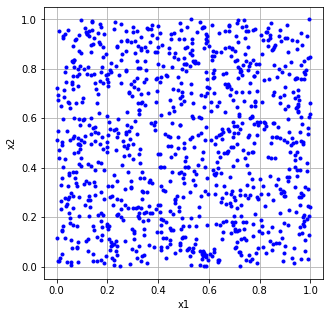

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(x1, x2, 'b.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

In [ ]:
def classify_data(x1, x2):
  target = []
  for i in range(len(x1)):
    if x1[i] < 0.5 and x2[i] < 0.5:
        target.append('type1')
    elif x1[i] >= 0.5 and x2[i] < 0.5:
        target.append('type2')
    elif x1[i] < 0.5 and x2[i] >= 0.5:
        target.append('type3')
    elif x1[i] >= 0.5 and x1[i] < 0.75 and x2[i] >= 0.5 and x2[i] < 0.75:
      target.append('type4')
    elif x1[i] >= 0.5 and x1[i] < 0.75 and x2[i] >= 0.75:
      target.append('type5')
    elif x1[i] >= 0.75 and x2[i] >= 0.5 and x2[i] < 0.75:
      target.append('type6')
    else:
      target.append('type7')
  return np.array(target)




In [ ]:
target = classify_data(x1, x2)
print(target[0 : 10])

['type3' 'type1' 'type3' 'type3' 'type7' 'type7' 'type2' 'type5' 'type2'
 'type3']


In [ ]:
print(len(target[target == 'type1']))
print(len(target[target == 'type2']))
print(len(target[target == 'type3']))
print(len(target[target == 'type4']))
print(len(target[target == 'type5']))
print(len(target[target == 'type6']))
print(len(target[target == 'type7']))

254
238
244
57
79
65
63


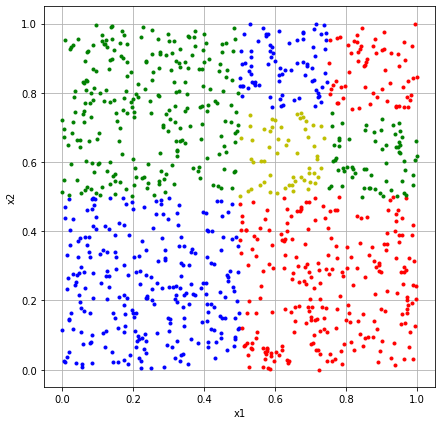

In [ ]:
plt.figure(figsize=(7, 7))
plt.plot(x1[target == 'type1'], x2[target == 'type1'], 'b.')
plt.plot(x1[target == 'type2'], x2[target == 'type2'], 'r.')
plt.plot(x1[target == 'type3'], x2[target == 'type3'], 'g.')
plt.plot(x1[target == 'type4'], x2[target == 'type4'], 'y.')
plt.plot(x1[target == 'type5'], x2[target == 'type5'], 'b.')
plt.plot(x1[target == 'type6'], x2[target == 'type6'], 'g.')
plt.plot(x1[target == 'type7'], x2[target == 'type7'], 'r.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

In [ ]:
# 데이터 합치기
def merge_data(x1, x2):
    ret = []
    for i in range(len(x1)):
        ret.append([x1[i], x2[i]])
    return np.array(ret)

In [ ]:
data = merge_data(x1, x2)
data[0 : 5]

array([[0.16305852, 0.94497764],
       [0.07648301, 0.33909315],
       [0.0612393 , 0.74619172],
       [0.43600922, 0.76992395],
       [0.92321732, 0.82799789]])

In [ ]:
encoder = LabelBinarizer()
print(target[0 : 10])

# binary로 바꿈, 본인이 필요시 만들어도 됨
target = encoder.fit_transform(target)

print(target[0 : 10])
print(encoder.classes_)

['type3' 'type1' 'type3' 'type3' 'type7' 'type7' 'type2' 'type5' 'type2'
 'type3']
[[0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]]
['type1' 'type2' 'type3' 'type4' 'type5' 'type6' 'type7']


In [ ]:
trn=800
x_train = data[0 : trn]
t_train = target[0 : trn]

#801부터 1000까지 test함
x_test = data[trn : ]
t_test = target[trn : ]

In [ ]:
# model1 = sigmoid 모델
from keras import optimizers

In [ ]:
model1 = Sequential()

# 입력이 2개 activation: signoid 16개, hidden layer 2개 
model1.add(Dense(16, input_dim = 2, activation = 'sigmoid' ))
model1.add(Dense(16, activation = 'sigmoid' ))
model1.add(Dense(7, activation = 'softmax'))

model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# model1.compile(optimizer = optimizers.Adam(lr = 0.001), loss = 'mean_squared_error')

# fit 은 학습을 시키는 것 batch는 몇개마다 학습을 시킬것인가
hist1 = model1.fit(x_train, t_train, epochs = 195, batch_size = 2)

Epoch 1/195
400/400 [==============================] - 1s 1ms/step - loss: 1.7896 - accuracy: 0.2557
Epoch 2/195
400/400 [==============================] - 0s 1ms/step - loss: 1.7197 - accuracy: 0.3129
Epoch 3/195
400/400 [==============================] - 0s 1ms/step - loss: 1.6802 - accuracy: 0.3829
Epoch 4/195
400/400 [==============================] - 0s 1ms/step - loss: 1.7056 - accuracy: 0.4908
Epoch 5/195
400/400 [==============================] - 0s 1ms/step - loss: 1.6490 - accuracy: 0.3686
Epoch 6/195
400/400 [==============================] - 0s 1ms/step - loss: 1.6316 - accuracy: 0.5885
Epoch 7/195
400/400 [==============================] - 0s 1ms/step - loss: 1.5160 - accuracy: 0.6354
Epoch 8/195
400/400 [==============================] - 0s 1ms/step - loss: 1.3896 - accuracy: 0.6651
Epoch 9/195
400/400 [==============================] - 0s 1ms/step - loss: 1.2798 - accuracy: 0.6828
Epoch 10/195
400/400 [==============================] - 0s 1ms/step - loss: 1.1418 - accura

In [ ]:
model1.metrics_names

['loss', 'accuracy']

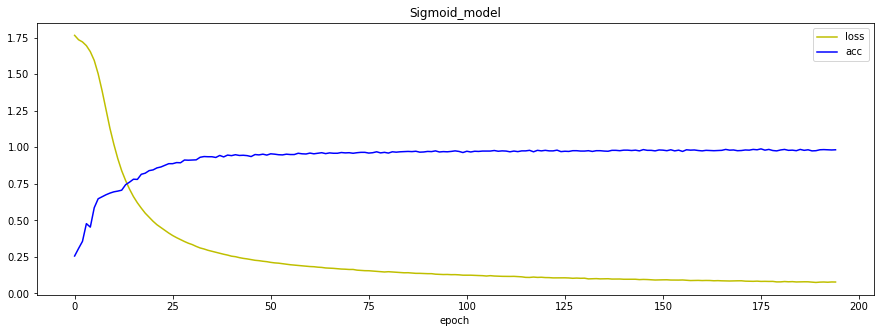

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(hist1.history['loss'], 'y', label = 'loss')
plt.plot(hist1.history['accuracy'], 'b', label = 'acc')
plt.xlabel('epoch')
plt.title('Sigmoid_model')
plt.legend(loc = 'best')
plt.show()

In [ ]:
model1_loss_and_metrics = model1.evaluate(x_test, t_test, batch_size = 10)
model1_loss_and_metrics

20/20 [==============================] - 0s 1ms/step - loss: 0.1091 - accuracy: 0.9750


[0.10908691585063934, 0.9750000238418579]

In [ ]:
print(model1.predict(x_test[[0]]))
print(t_test[0])

[[9.9980754e-01 1.6767497e-04 2.4508532e-05 1.9586771e-07 2.4073656e-14
  1.2976594e-13 1.2149043e-24]]
[1 0 0 0 0 0 0]


In [ ]:
# 예측값
for i in range(10):
  x = list(model1.predict(x_test[[i]])[0])

  print(x.index(max(x)))

0
1
0
2
1
5
0
2
4
0


In [ ]:
# 실제값
for i in range(10):
  x = list(t_test[i])

  print(x.index(max(x)))

0
1
0
2
1
5
0
2
4
0


In [ ]:
# model2 = relu 모델
model2 = Sequential()
model2.add(Dense(16, input_dim = 2, activation = 'relu' ))
model2.add(Dense(16, activation = 'relu' ))
model2.add(Dense(7, activation = 'softmax'))
model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
hist2 = model2.fit(x_train, t_train, epochs = 80, batch_size = 20)

Epoch 1/80
40/40 [==============================] - 0s 984us/step - loss: 1.9079 - accuracy: 0.2002
Epoch 2/80
40/40 [==============================] - 0s 980us/step - loss: 1.7684 - accuracy: 0.4653
Epoch 3/80
40/40 [==============================] - 0s 1ms/step - loss: 1.6276 - accuracy: 0.4591
Epoch 4/80
40/40 [==============================] - 0s 993us/step - loss: 1.4514 - accuracy: 0.5145
Epoch 5/80
40/40 [==============================] - 0s 1ms/step - loss: 1.3613 - accuracy: 0.5263
Epoch 6/80
40/40 [==============================] - 0s 980us/step - loss: 1.2544 - accuracy: 0.5394
Epoch 7/80
40/40 [==============================] - 0s 956us/step - loss: 1.1265 - accuracy: 0.6082
Epoch 8/80
40/40 [==============================] - 0s 1ms/step - loss: 1.1113 - accuracy: 0.5999
Epoch 9/80
40/40 [==============================] - 0s 1ms/step - loss: 1.0275 - accuracy: 0.6132
Epoch 10/80
40/40 [==============================] - 0s 1ms/step - loss: 0.9417 - accuracy: 0.6586
Epoch 11/

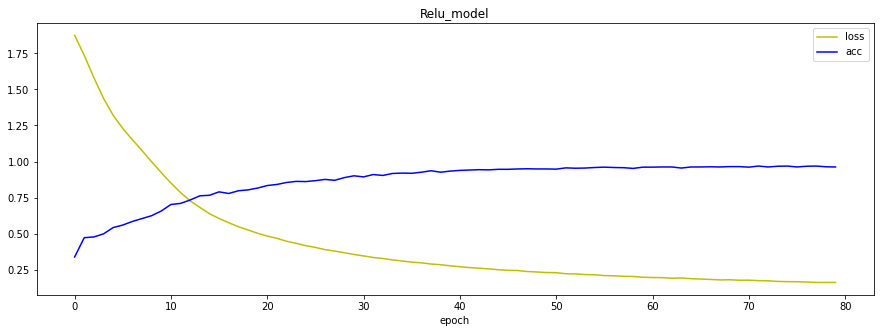

In [ ]:
plt.figure(figsize = (15, 5))
plt.plot(hist2.history['loss'], 'y', label = 'loss')
plt.plot(hist2.history['accuracy'], 'b', label = 'acc')
plt.xlabel('epoch')
plt.title('Relu_model')
plt.legend(loc = 'best')
plt.show()

In [ ]:
model2_loss_and_metrics = model2.evaluate(x_test, t_test, batch_size = 20)
model2_loss_and_metrics

10/10 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.9550


[0.185850128531456, 0.9549999833106995]

In [ ]:
predict1 = model1.predict(x_test)
print(predict1)

[[9.99807537e-01 1.67675127e-04 2.45085084e-05 ... 2.40736115e-14
  1.29765949e-13 1.21490447e-24]
 [1.85877724e-07 9.99973059e-01 6.81639033e-12 ... 5.51057316e-15
  1.03185175e-05 1.12410272e-15]
 [9.99211788e-01 7.61431700e-04 2.60255074e-05 ... 8.23263712e-14
  9.75471114e-13 1.18485630e-23]
 ...
 [9.99706686e-01 2.45981384e-04 4.68078288e-05 ... 7.41488509e-14
  3.03130459e-13 4.15095966e-24]
 [9.99940753e-01 3.99788441e-05 1.93434425e-05 ... 5.92386849e-15
  1.84446761e-14 1.21785468e-25]
 [1.53393239e-01 8.46379042e-01 2.05776701e-06 ... 2.04795642e-12
  2.64319056e-08 7.33558346e-19]]


In [ ]:
predict2 = model2.predict(x_test)
print(predict2)

[[9.9881858e-01 1.1730284e-03 2.0801983e-06 ... 3.8927889e-11
  2.2725608e-09 8.5667564e-14]
 [5.9721565e-06 9.9993217e-01 1.3414279e-11 ... 5.9171277e-13
  5.6333414e-05 1.5568592e-10]
 [9.9163282e-01 8.3293319e-03 3.2540161e-06 ... 1.7883736e-10
  3.6955033e-08 1.3098115e-12]
 ...
 [9.9828291e-01 1.6323087e-03 3.7593021e-05 ... 1.5039910e-09
  1.1163615e-08 1.8664432e-12]
 [9.9959880e-01 3.9983910e-04 4.4722853e-07 ... 1.8962065e-12
  2.8620997e-10 2.2763949e-15]
 [2.5558090e-01 7.4433243e-01 1.5023234e-07 ... 5.3897938e-11
  3.9350666e-06 1.6637323e-11]]


In [ ]:
# 예측 확인
# 예측이 틀린 것들만
for i in range(len(t_test)):
    if np.argmax(t_test[i]) != np.argmax(predict1[i]):
        print(i, format(x_test[i, 0], "1.4f"), format(x_test[i, 1], "1.4f"), np.argmax(t_test[i]), np.argmax(predict1[i]))

84 0.5294 0.7367 3 4
89 0.7522 0.5241 5 1
114 0.4849 0.9860 2 4
117 0.9311 0.4991 1 5
144 0.4884 0.9559 2 4


In [ ]:
for i in range(len(t_test)):
    if np.argmax(t_test[i]) != np.argmax(predict2[i]):
        print(i, format(x_test[i, 0], "1.4f"), format(x_test[i, 1], "1.4f"), np.argmax(t_test[i]), np.argmax(predict2[i]))

84 0.5294 0.7367 3 2
89 0.7522 0.5241 5 1
114 0.4849 0.9860 2 4
117 0.9311 0.4991 1 5
119 0.7535 0.8866 6 4
144 0.4884 0.9559 2 4
146 0.4988 0.1641 0 1
152 0.5299 0.7031 3 2
155 0.5910 0.7255 3 4


In [ ]:
# mode1예측값
for i in range(10):
  x = list(model1.predict(x_test[[i]])[0])

  print(x.index(max(x)))

0
1
0
2
1
5
0
2
4
0


In [ ]:
# mode2예측값
for i in range(10):
  x = list(model2.predict(x_test[[i]])[0])

  print(x.index(max(x)))

0
1
0
2
1
5
0
2
4
0


In [ ]:
# 실제값
for i in range(10):
  x = list(t_test[i])

  print(x.index(max(x)))

0
1
0
2
1
5
0
2
4
0


In [ ]:
for i in range(len(x_test)):
  m1 = list(model1.predict(x_test[[i]])[0])
  m2 = list(model1.predict(x_test[[i]])[0])
  x = list(t_test[i])
  # 번호, model1 예측값, model2 예측값 실제 test값
  # 0부터 type1, 6은 type7
  print(i, m1.index(max(m1)), m2.index(max(m2)), x.index(max(x)))

0 0 0 0
1 1 1 1
2 0 0 0
3 2 2 2
4 1 1 1
5 5 5 5
6 0 0 0
7 2 2 2
8 4 4 4
9 0 0 0
10 2 2 2
11 2 2 2
12 0 0 0
13 2 2 2
14 0 0 0
15 1 1 1
16 1 1 1
17 2 2 2
18 1 1 1
19 0 0 0
20 4 4 4
21 2 2 2
22 1 1 1
23 1 1 1
24 1 1 1
25 4 4 4
26 5 5 5
27 6 6 6
28 5 5 5
29 2 2 2
30 3 3 3
31 2 2 2
32 2 2 2
33 0 0 0
34 2 2 2
35 2 2 2
36 1 1 1
37 1 1 1
38 5 5 5
39 1 1 1
40 0 0 0
41 2 2 2
42 1 1 1
43 3 3 3
44 1 1 1
45 4 4 4
46 1 1 1
47 0 0 0
48 1 1 1
49 6 6 6
50 4 4 4
51 5 5 5
52 5 5 5
53 2 2 2
54 0 0 0
55 0 0 0
56 5 5 5
57 0 0 0
58 5 5 5
59 2 2 2
60 4 4 4
61 0 0 0
62 5 5 5
63 0 0 0
64 2 2 2
65 2 2 2
66 0 0 0
67 1 1 1
68 5 5 5
69 2 2 2
70 0 0 0
71 0 0 0
72 2 2 2
73 3 3 3
74 0 0 0
75 0 0 0
76 1 1 1
77 2 2 2
78 2 2 2
79 4 4 4
80 0 0 0
81 2 2 2
82 1 1 1
83 2 2 2
84 4 4 3
85 2 2 2
86 2 2 2
87 2 2 2
88 0 0 0
89 1 1 5
90 1 1 1
91 0 0 0
92 2 2 2
93 2 2 2
94 3 3 3
95 1 1 1
96 0 0 0
97 1 1 1
98 2 2 2
99 1 1 1
100 0 0 0
101 2 2 2
102 6 6 6
103 2 2 2
104 1 1 1
105 1 1 1
106 1 1 1
107 0 0 0
108 1 1 1
109 1 1 1
110 4 4 4


In [ ]:
# sigmoid 모델
model1_loss_and_metrics = model1.evaluate(x_test, t_test, batch_size = 20)
model1_loss_and_metrics

10/10 [==============================] - 0s 2ms/step - loss: 0.1091 - accuracy: 0.9750


[0.10908693075180054, 0.9750000238418579]

In [ ]:
# relu 모델
model2_loss_and_metrics = model2.evaluate(x_test, t_test, batch_size = 20)
model2_loss_and_metrics

10/10 [==============================] - 0s 2ms/step - loss: 0.1859 - accuracy: 0.9550


[0.185850128531456, 0.9549999833106995]